# Z3 SAT Exercises

> Before trying to solve the exercises contained in this notebook, the reader is suggested to have gained experience with the tool through the `Z3 Tutorial.ipynb` notebook.

In [1]:
from itertools import combinations
from z3 import *
from utils import *

## Knights & Knaves

In [2]:
# Which are the variables?
AisKnight = Bool("AisKnight")
BisKnight = Bool("BisKnight")

s = Solver()

# Encode A's statement
AStatement = Or(Not(AisKnight), BisKnight)

# If A is a knight, then A's statement is true
s.add(Implies(AisKnight, AStatement))
# If A is a knave, then A's statement is a lie
s.add(Implies(Not(AisKnight), Not(AStatement)))

# Unicity check
# s.add(Not(And(AisKnight, BisKnight)))

if s.check() == sat:
    print(s.model())
else:
    print("Failed to solve")

[AisKnight = True, BisKnight = True]


## N-Queens

In [3]:
def at_least_one(bool_vars):
    return Or(bool_vars)

def at_most_one(bool_vars):
    return [Not(And(pair[0], pair[1])) for pair in combinations(bool_vars, 2)]

In [4]:
def nqueens_sat(n):
    # Create all the variables
    p = [[Bool(f"x_{i}_{j}") for j in range(n)] for i in range(n)]

    # Create the solver instance
    s = Solver()

    # At least one on each row and column
    for i in range(n):
        s.add(at_least_one(p[i]))
        s.add(at_least_one([p[j][i] for j in range(n)]))

    # At most one on each row and column
    for i in range(n):
        col_i = []
        for j in range(n):
            col_i += [p[j][i]]
        s.add(at_most_one(p[i]))
        s.add(at_most_one(col_i))

    # Add the diagonal constraints
    for i in range(n - 1):
        diag_ru = []
        diag_lu = []
        diag_rl = []
        diag_ll = []
        for j in range(n - i):
            diag_ru += [p[i + j][j]]
            diag_lu += [p[n - 1 - (i + j)][j]]
            diag_rl += [p[i + j][n - 1 - j]]
            diag_ll += [p[n - 1 - (i + j)][n - 1 - j]]
        s.add(at_most_one(diag_ru))
        s.add(at_most_one(diag_lu))
        s.add(at_most_one(diag_rl))
        s.add(at_most_one(diag_ll))

    s.check()

    m = s.model()
    return [(i, j) for i in range(n) for j in range(n) if m.evaluate(p[i][j])]

In [5]:
%%time
display_nqueens(nqueens_sat(20))

. . . . . . . . . ♛ . . . . . . . . . . 
. . . . . . . . . . . . ♛ . . . . . . . 
. . . . . . . . ♛ . . . . . . . . . . . 
. . . . . . . . . . . ♛ . . . . . . . . 
. . . . . . . ♛ . . . . . . . . . . . . 
. . . . . . . . . . ♛ . . . . . . . . . 
. . . . . . . . . . . . . . . . . . . ♛ 
♛ . . . . . . . . . . . . . . . . . . . 
. . . . ♛ . . . . . . . . . . . . . . . 
. . . . . . . . . . . . . ♛ . . . . . . 
. . . . . . . . . . . . . . . . . ♛ . . 
. . . . . . ♛ . . . . . . . . . . . . . 
. . . . . . . . . . . . . . ♛ . . . . . 
. . . ♛ . . . . . . . . . . . . . . . . 
. . . . . ♛ . . . . . . . . . . . . . . 
. . . . . . . . . . . . . . . ♛ . . . . 
. . ♛ . . . . . . . . . . . . . . . . . 
. . . . . . . . . . . . . . . . . . ♛ . 
. . . . . . . . . . . . . . . . ♛ . . . 
. ♛ . . . . . . . . . . . . . . . . . . 
CPU times: user 1.55 s, sys: 13.5 ms, total: 1.57 s
Wall time: 1.58 s


## Sudoku

In [6]:
# Sudoku instances, '0's correspond to empty cells

instance1 = ((0, 0, 0, 0, 9, 4, 0, 3, 0),
             (0, 0, 0, 5, 1, 0, 0, 0, 7),
             (0, 8, 9, 0, 0, 0, 0, 4, 0),
             (0, 0, 0, 0, 0, 0, 2, 0, 8),
             (0, 6, 0, 2, 0, 1, 0, 5, 0),
             (1, 0, 2, 0, 0, 0, 0, 0, 0),
             (0, 7, 0, 0, 0, 0, 5, 2, 0),
             (9, 0, 0, 0, 6, 5, 0, 0, 0),
             (0, 4, 0, 9, 7, 0, 0, 0, 0))

instance2 = ((0, 0, 0, 0, 9, 0, 1, 0, 0),
             (2, 8, 0, 0, 0, 5, 0, 0, 0),
             (7, 0, 0, 0, 0, 6, 4, 0, 0),
             (8, 0, 5, 0, 0, 3, 0, 0, 6),
             (0, 0, 1, 0, 0, 4, 0, 0, 0),
             (0, 7, 0, 2, 0, 0, 0, 0, 0),
             (3, 0, 0, 0, 0, 1, 0, 8, 0),
             (0, 0, 0, 0, 0, 0, 0, 5, 0),
             (0, 9, 0, 0, 0, 0, 0, 7, 0))

instance3 = ((0, 7, 0, 0, 0, 0, 0, 4, 9),
             (0, 0, 0, 4, 0, 0, 0, 0, 0),
             (4, 0, 3, 5, 0, 7, 0, 0, 8),
             (0, 0, 7, 2, 5, 0, 4, 0, 0),
             (0, 0, 0, 0, 0, 0, 8, 0, 0),
             (0, 0, 4, 0, 3, 0, 5, 9, 2),
             (6, 1, 8, 0, 0, 0, 0, 0, 5),
             (0, 9, 0, 1, 0, 0, 0, 3, 0),
             (0, 0, 5, 0, 0, 0, 0, 0, 7))

instance4 = ((0, 0, 0, 0, 0, 6, 0, 0, 0),
             (0, 5, 9, 0, 0, 0, 0, 0, 8),
             (2, 0, 0, 0, 0, 8, 0, 0, 0),
             (0, 4, 5, 0, 0, 0, 0, 0, 0),
             (0, 0, 3, 0, 0, 0, 0, 0, 0),
             (0, 0, 6, 0, 0, 3, 0, 5, 4),
             (0, 0, 0, 3, 2, 5, 0, 0, 6),
             (0, 0, 0, 0, 0, 0, 0, 0, 0),
             (0, 0, 0, 0, 0, 0, 0, 0, 0))

In [7]:
def exactly_one(solver, bool_vars):
    solver.add(at_most_one(bool_vars))
    solver.add(at_least_one(bool_vars))

In [8]:
def sudoku_sat(instance):
    # All the variables we need: for each cell, nine variables that determine which digit must be assigned.
    v = [[[Bool(f"v_{i}_{j}_{k}") for k in range(9)] for j in range(9)] for i in range(9)]

    s = Solver()

    # A cell has only one value
    for i in range(9):
        for j in range(9):
            exactly_one(s, v[i][j])

    # Each value is used only once in a row
    for j in range(9):
        for k in range(9):
            exactly_one(s, [v[i][j][k] for i in range(9)])

    # Each value used exactly once in each column
    for i in range(9):
        for k in range(9):
            exactly_one(s, [v[i][j][k] for j in range(9)])

    # Each value used exactly once in each 3x3 grid.
    for ii in range(3):
        for jj in range(3):
            for k in range(9):
                grid_cells = [v[3 * ii + a][3 * jj + b][k] for a in range(3) for b in range(3)]
                exactly_one(s, grid_cells)

    # Some numbers are already available
    for i in range(9):
        for j in range(9):
            if instance[i][j] > 0:
                s.add(v[i][j][instance[i][j] - 1])

    if s.check() == sat:
        m = s.model()
        sol = []
        for i in range(9):
            sol.append([])
            for j in range(9):
                for k in range(9):
                    if m.evaluate(v[i][j][k]):
                        sol[i].append(k+1)
        return sol
    else:
        print("Failed to solve")

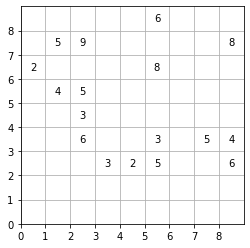

In [9]:
# Select the instance you want to solve
instance = instance4
display_sudoku(instance)

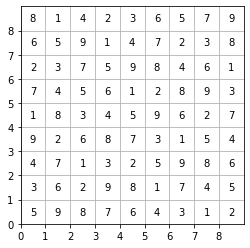

CPU times: user 1.95 s, sys: 33.5 ms, total: 1.99 s
Wall time: 2 s


In [10]:
%%time
display_sudoku(sudoku_sat(instance))